# Python: Data Cleaning and Data Processing Using Pandas

In [68]:
# import required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

Data cleaning for indicators of energy supply and renewable electricity production from the United Nations for the year 2013

In [2]:
# data cleaning for indicators of energy supply and renewable electricity production from the United Nations for the year 2013
energy = pd.read_excel('Energy Indicators.xls')
energy = energy[17:243].drop(energy.columns[[0,1]], axis=1) #delete several coloumn and row
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy = energy.replace('...', np.NaN)
energy['Country'] = energy['Country'].str.replace(r" \(.*\)","").str.replace(r"([0-9]+)$","") #remove number and parenthesis
energy['Energy Supply'] = energy['Energy Supply']*1000000
energy = energy.set_index('Country')
energy.rename(index={'Republic of Korea': 'South Korea'}, inplace=True)
energy.rename(index={'United States of America':'United States'}, inplace=True)
energy.rename(index={'United Kingdom of Great Britain and Northern Ireland':"United Kingdom"}, inplace=True)
energy.rename(index={'China, Hong Kong Special Administrative Region':'Hong Kong'}, inplace=True)
energy

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650
...,...,...,...
Venezuela,2.871000e+09,95.0,67.834520
Viet Nam,2.554000e+09,28.0,45.321520
Wallis and Futuna Islands,0.000000e+00,26.0,0.000000


Data cleaning for GDP from world bank

In [3]:
# data cleaning for GDP from world bank
GDP = pd.read_csv('world_bank.csv')
GDP = GDP[4:].drop(GDP.iloc[:, 1:50], axis = 1)
GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
GDP = GDP.set_index('Country')
GDP.rename(index={"Korea, Rep.": "South Korea"}, inplace = True) 
GDP.rename(index={"Iran, Islamic Rep.": "Iran"}, inplace = True)
GDP.rename(index={"Hong Kong SAR, China": "Hong Kong"}, inplace = True)
GDP

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...
"Yemen, Rep.",2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
South Africa,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
"Congo, Dem. Rep.",1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10


Data cleaning for Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology

In [4]:
# data cleaning for Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology
ScimEn = pd.read_excel('scimagojr-3.xlsx')
idx = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index']
ScimEn[idx] = ScimEn[idx].astype(float) #change data type into float
ScimEn = ScimEn.set_index('Country')
ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0
...,...,...,...,...,...,...,...
Guyana,187.0,1.0,1.0,0.0,0.0,0.00,0.0
Christmas Island,188.0,1.0,1.0,0.0,0.0,0.00,0.0
Reunion,189.0,1.0,1.0,2.0,1.0,2.00,1.0


Join 3 datasets

In [5]:
# join 3 datasets
Top15 = pd.merge(ScimEn, energy, how='outer', left_index=True, right_index=True)
Top15 = pd.merge(Top15, GDP, how='outer', left_index=True, right_index=True)
Top15 = Top15[Top15['Rank'] <= 15]
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14.0,8831.0,8725.0,90765.0,15606.0,10.28,107.0,5.386000e+09,231.0,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15.0,8668.0,8596.0,60702.0,14396.0,7.00,86.0,1.214900e+10,59.0,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Iran,13.0,8896.0,8819.0,57470.0,19125.0,6.46,72.0,9.172000e+09,119.0,5.707721,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
Italy,11.0,10964.0,10794.0,111850.0,26661.0,10.20,106.0,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


## Data Processing

#### 1. What is the average GDP over the last 10 years for each country?

In [38]:
def processing_one():
    avgGDP = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis = 1).sort_values(ascending = False)
    avgGDP = avgGDP.to_frame('Average GDP')
    return avgGDP
    
processing_one()

,Average GDP
Country,
United States,1.536434e+13
China,6.348609e+12
Japan,5.542208e+12
Germany,3.493025e+12
France,2.681725e+12
United Kingdom,2.487907e+12
Brazil,2.189794e+12
Italy,2.120175e+12
India,1.769297e+12


#### 2. From the country with the 6th largest average GDP, how much had the GDP changed over the 10 years?

In [34]:
def processing_two():
    avgGDP = processing_one()
    avgidx = avgGDP.index[5] # 6th largest average GDP  country : UK
    delGDP = Top15.loc[avgidx]['2015'] - Top15.loc[avgidx]['2006']
    return {"Country": avgidx, "GDP Difference": delGDP}

processing_two()

{'Country': 'United Kingdom', 'GDP Difference': 246702696075.3999}

#### 3. What country has the maximum % Renewable and what is the percentage?

In [39]:
def processing_three():
    Top15['% Renewable'] = pd.to_numeric(Top15['% Renewable'])
    maxRen = Top15['% Renewable'].max()
    maxidx = Top15['% Renewable'].idxmax()
    return {"Country": maxidx, "Max % Renewable": maxRen}

processing_three()

{'Country': 'Brazil', 'Max % Renewable': 69.64803}

#### 4. Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

In [107]:
def processing_four():
    Top15_proc = Top15
    Top15_proc['Ratio Citations'] = Top15_proc['Self-citations']/Top15_proc['Citations']
    ratCit = Top15_proc['Ratio Citations'].to_frame('Ratio Citations')
    print(ratCit)
    maxRat = Top15_proc['Ratio Citations'].max()
    maxidx = Top15_proc['Ratio Citations'].idxmax()
    
    return {"Country": maxidx, "Max Ratio Citation": maxRat}

processing_four()

                    Ratio Citations
Country                            
Australia                  0.171939
Brazil                     0.237159
Canada                     0.190369
China                      0.689313
France                     0.218943
Germany                    0.195111
India                      0.288973
Iran                       0.332782
Italy                      0.238364
Japan                      0.275997
Russian Federation         0.362517
South Korea                0.197035
Spain                      0.194299
United Kingdom             0.183773
United States              0.335031


{'Country': 'China', 'Max Ratio Citation': 0.6893126179389422}

#### 5. Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

In [63]:
def processing_five():
    Top15_proc = Top15
    Top15_proc['Population Estimation'] = Top15_proc['Energy Supply']/Top15_proc['Energy Supply per Capita']
    popEs = Top15_proc['Population Estimation'].to_frame('Population Estimation')
    print(popEs)
    Top15_proc = Top15_proc.sort_values('Energy Supply', ascending = False)
    PopEs_idx = Top15_proc.index[2]
    PopEs_val = Top15_proc['Population Estimation'].loc[PopEs_idx]
    
    return {"Country": PopEs_idx, "3rd Most Population Estimation": PopEs_val}

processing_five()

                    Population Estimation
Country                                  
Australia                    2.331602e+07
Brazil                       2.059153e+08
Canada                       3.523986e+07
China                        1.367645e+09
France                       6.383735e+07
Germany                      8.036970e+07
India                        1.276731e+09
Iran                         7.707563e+07
Italy                        5.990826e+07
Japan                        1.274094e+08
Russian Federation           1.435000e+08
South Korea                  4.980543e+07
Spain                        4.644340e+07
United Kingdom               6.387097e+07
United States                3.176154e+08


{'Country': 'India', '3rd Most Population Estimation': 1276730769.2307692}

#### 6. Create a column that estimates the number of citable documents per person (Population Estimation, as previously calculated).  What is the correlation between the number of citable documents per capita and the energy supply per capita?

In [110]:
def processing_six():
    Top15_proc = Top15
    PopEs = Top15_proc['Energy Supply']/Top15_proc['Energy Supply per Capita']
    Top15_proc['Citable Documents per Person'] = (Top15_proc['Citable documents']/PopEs).astype('float')
    Top15_proc['Energy Supply per Capita'] = Top15_proc['Energy Supply per Capita'].astype('float')
    energySupp = Top15_proc['Energy Supply per Capita'].to_frame('Energy Supply per Capita')
    print(energySupp)
    
    corr = Top15_proc['Citable Documents per Person'].corr(Top15_proc['Energy Supply per Capita'])
    
    return {"Correlation between the number of citable documents per capita and the energy supply per capita": corr}

processing_six()

                    Energy Supply per Capita
Country                                     
Australia                              231.0
Brazil                                  59.0
Canada                                 296.0
China                                   93.0
France                                 166.0
Germany                                165.0
India                                   26.0
Iran                                   119.0
Italy                                  109.0
Japan                                  149.0
Russian Federation                     214.0
South Korea                            221.0
Spain                                  106.0
United Kingdom                         124.0
United States                          286.0


{'Correlation between the number of citable documents per capita and the energy supply per capita': 0.7940010435442942}

#### 7. Show the correlation plot in Top15!

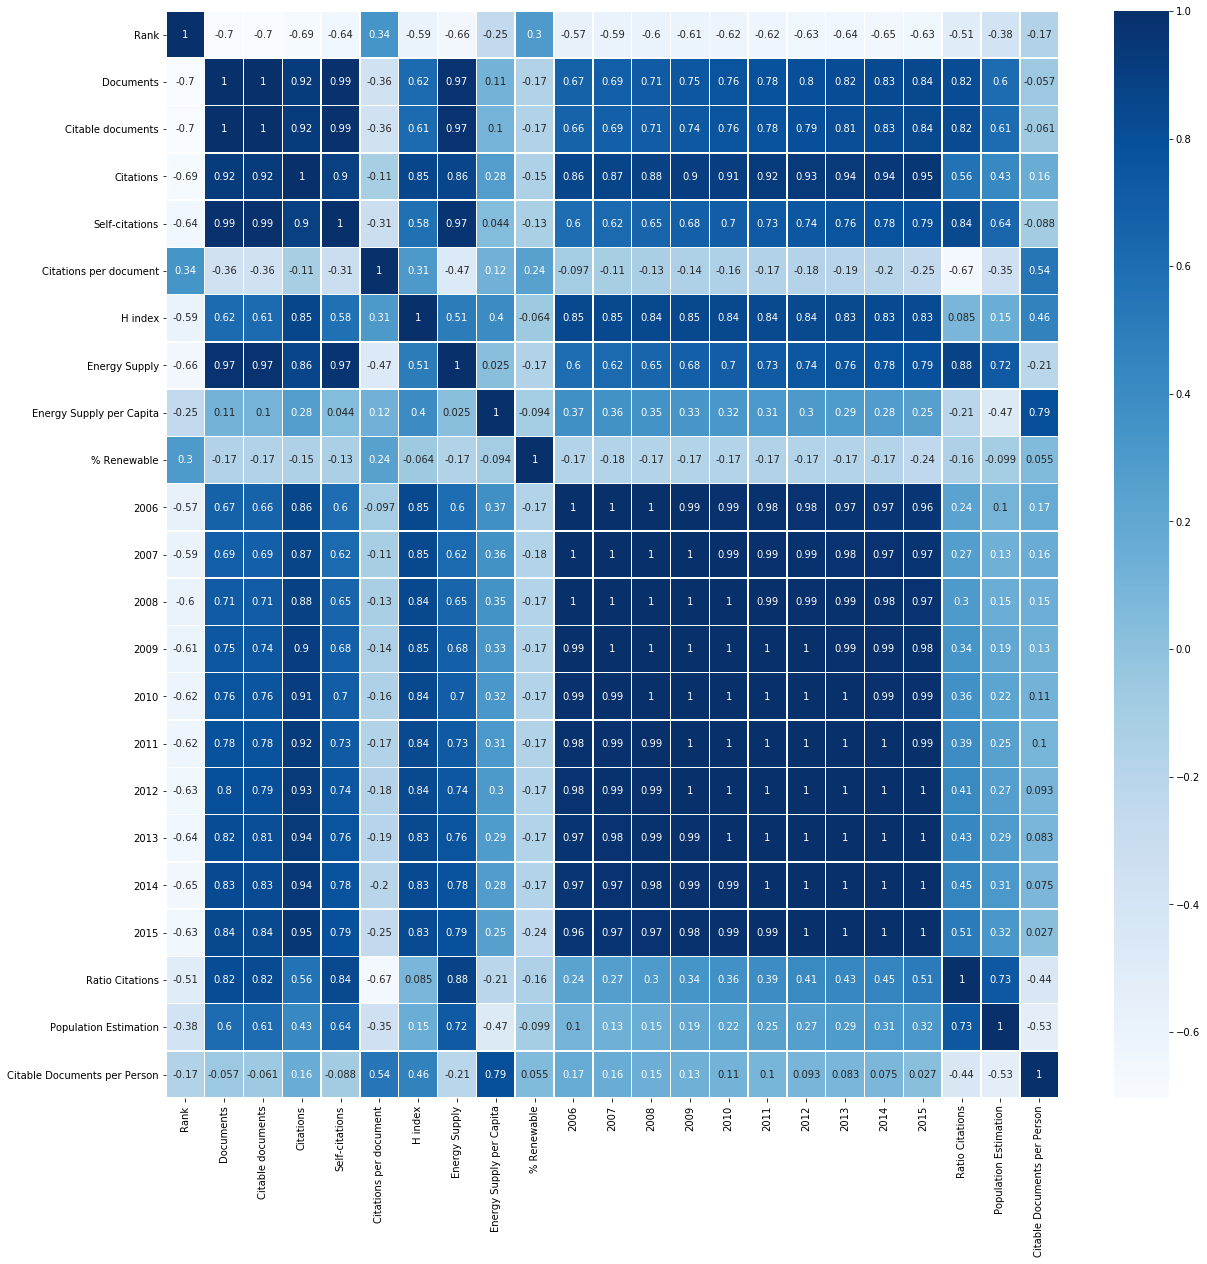

In [104]:
def processing_seven():
    Top15_proc = Top15    
    corr = Top15_proc.corr()
    fig, ax = plt.subplots(figsize=(20,20))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, ax=ax, linewidths=.5, annot=True, cmap='Blues')
    
    return

processing_seven()

#### 8. Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [13]:
# Create variable for continent dictionary
ContinentDict  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}

In [14]:
def processing_eight():
    Top15_proc = Top15
    Top15_proc['Population Estimation'] = pd.to_numeric(Top15_proc['Energy Supply']/Top15_proc['Energy Supply per Capita'])
    Top15_proc = Top15_proc.reset_index()
    Top15_proc['Continent'] = Top15_proc['Country'].map(ContinentDict)
    continent = Top15_proc.groupby('Continent')['Population Estimation'].agg(size = "size", sum = "sum", mean = "mean", std = "std")
    return continent

processing_eight()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


#### 9. Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

In [103]:
def processing_nine():
    Top15_proc = Top15.reset_index()
    Top15_proc['Continent'] = Top15_proc['Country'].map(ContinentDict)
    Top15_proc['% Renewable'] = pd.cut(Top15_proc['% Renewable'], 5)
    continent_bin = Top15_proc.groupby(['Continent', '% Renewable'])['Country'].count()
    continent_bin = continent_bin.to_frame('Number of Countries')
    print(continent_bin)
    
    return

processing_nine()

                                Number of Countries
Continent     % Renewable                          
Asia          (2.212, 15.753]                     4
              (15.753, 29.227]                    1
              (29.227, 42.701]                    0
              (42.701, 56.174]                    0
              (56.174, 69.648]                    0
Australia     (2.212, 15.753]                     1
              (15.753, 29.227]                    0
              (29.227, 42.701]                    0
              (42.701, 56.174]                    0
              (56.174, 69.648]                    0
Europe        (2.212, 15.753]                     1
              (15.753, 29.227]                    3
              (29.227, 42.701]                    2
              (42.701, 56.174]                    0
              (56.174, 69.648]                    0
North America (2.212, 15.753]                     1
              (15.753, 29.227]                    0
            